<a href="https://colab.research.google.com/github/shimizukeita/fastai_course/blob/main/02Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
#[ -e /content ]:contentというパスがあるかを判断する条件文。google colab環境にはcontentというパスがデフォルトであるため、google colab環境の場合に実行されるコマンド
#-U:パッケージをアップデート
#qq:ログの出力をError,Criticalレベルに限定

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.8 MB/s eta 0:00:00


In [ ]:
#hide
import fastbook
#fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# モデルを構築する

## データを収集する

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
dog_types = 'ShibaInu','Kooikerhondje','LabradorRetriever'
path = Path('dogs')
path.mkdir()

In [ ]:
for o in dog_types:
  dest = (path/o)
  dest.mkdir(exist_ok=True,parents=True)
  results = search_images_ddg(f'dog {o}')
  download_images(dest,urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#538) [Path('dogs/ShibaInu/1e7b71c5-a2c1-4eca-b542-92234b293973.jpg'),Path('dogs/ShibaInu/0d79af34-82e1-4fcc-bee9-655d775f5159.jpg'),Path('dogs/ShibaInu/42fd2881-2072-43b0-a32f-3ee98654df9d.jpg'),Path('dogs/ShibaInu/bda22c37-4d9a-413d-b8c5-f6d37de306a3.jpg'),Path('dogs/ShibaInu/cb148518-13ea-4160-87fd-37a2136e7e7f.jpg'),Path('dogs/ShibaInu/7bc96fbe-646b-48ff-839a-e1a15f29287c.jpg'),Path('dogs/ShibaInu/af217fef-086e-4523-92f3-b84c00fc1928.jpg'),Path('dogs/ShibaInu/8b6fd4fb-abd1-497f-8d44-ef1effc92c28.jpg'),Path('dogs/ShibaInu/8171bcc1-5e6f-4f3f-8288-1f66df4d5761.jpg'),Path('dogs/ShibaInu/f33859ec-b51b-4ffd-9c5f-efacde2f1077.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#14) [Path('dogs/ShibaInu/3bab848a-cb74-4a15-94e7-03a3a6383201.jpg'),Path('dogs/ShibaInu/a43ec90c-212d-4850-a523-599dae1921cd.jpg'),Path('dogs/ShibaInu/0fb5f596-80a6-4065-8bac-285d8e96b4d1.jpg'),Path('dogs/ShibaInu/dbe2e0de-9fb7-4529-be9f-a7e146990e81.jpg'),Path('dogs/ShibaInu/c8c57b92-8b01-4600-9b4a-a3efa656561c.jpg'),Path('dogs/ShibaInu/ba1e1ed2-5313-4a54-a231-9f7713a1ba7e.jpg'),Path('dogs/ShibaInu/536813dd-5d68-42a3-bb41-0d625db11c68.jpg'),Path('dogs/ShibaInu/5befe737-2eaf-4b50-baf7-db26f3fe8fd7.jpg'),Path('dogs/Kooikerhondje/d266acb4-0fb6-4a9a-9551-36fe8591590b.jpg'),Path('dogs/Kooikerhondje/63c45c0a-1fa8-4f71-938a-eb77578e6388.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#14) [None,None,None,None,None,None,None,None,None,None...]

## モデル用にデータを整備

In [ ]:
dogs = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = dogs.dataloaders(path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


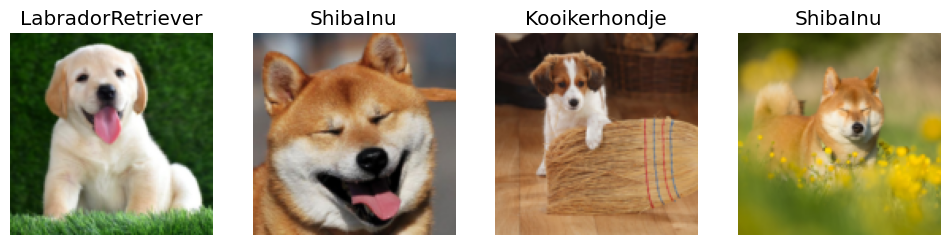

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1)

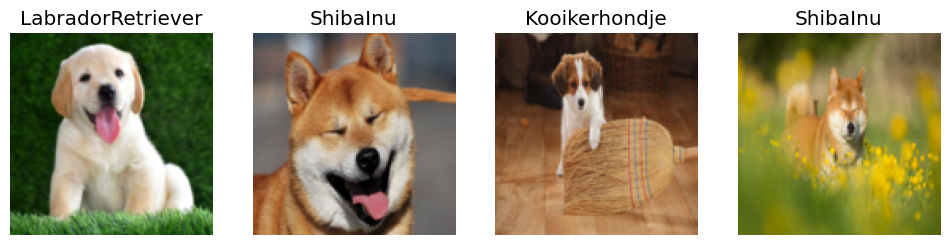

In [ ]:
#画像引き伸ばしによるサイズの統一
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

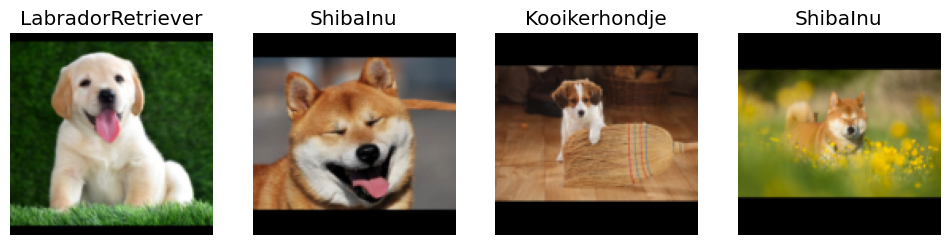

In [ ]:
#空白箇所を黒で埋めるサイズの統一
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

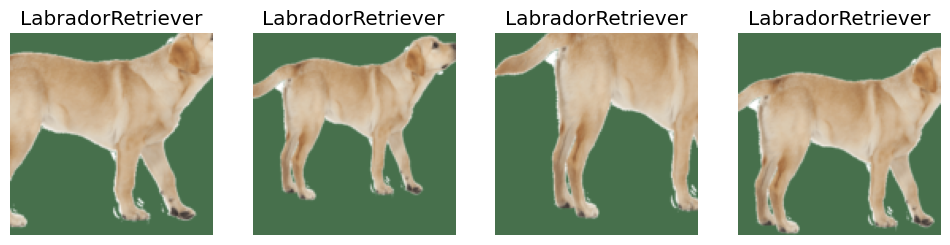

In [ ]:
#画像の一部切り抜き等による画像サイズの統一
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

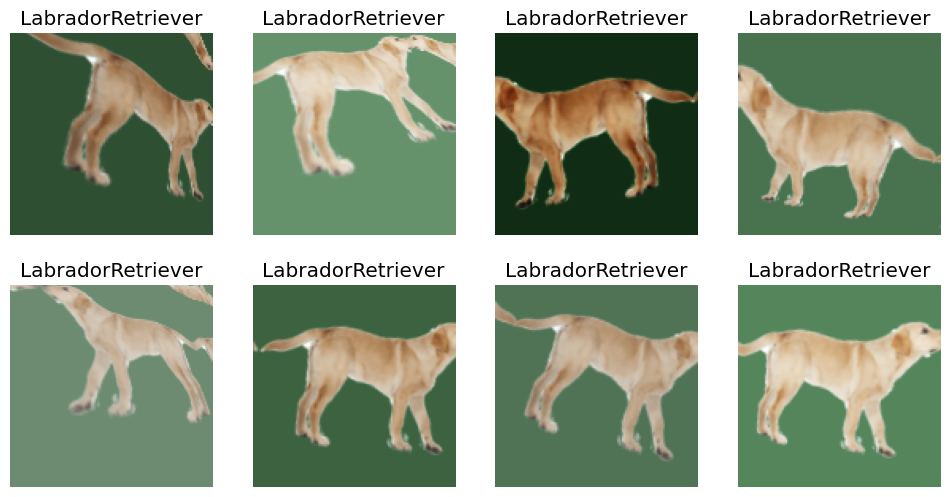

In [ ]:
#データ拡張
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## モデル作成

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.248938,0.015185,0.000000,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.422170,0.020708,0.009615,00:21
1,0.338111,0.023337,0.009615,00:19
2,0.269265,0.032372,0.019231,00:20
3,0.235694,0.033766,0.019231,00:22


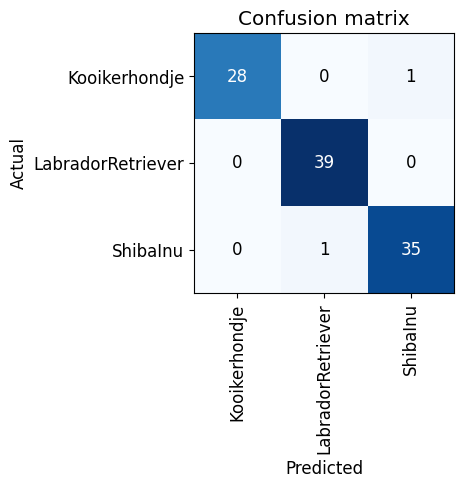

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

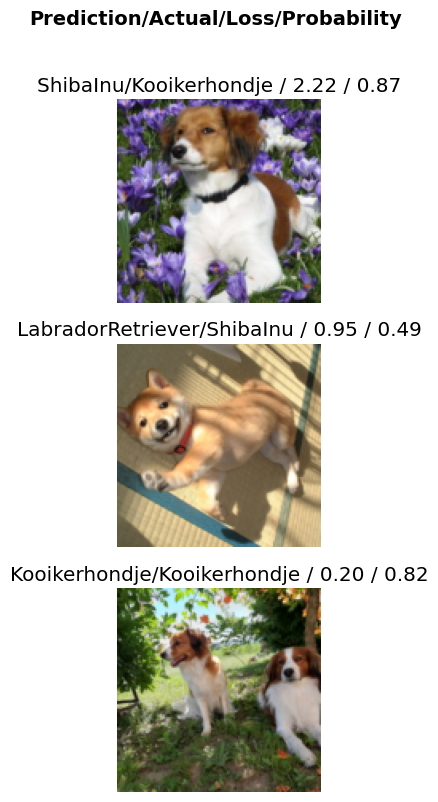

In [ ]:
interp.plot_top_losses(3, nrows=3)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# for idx in cleaner.delete():cleaner.fns[idx].unlink() #fns[idx]はPathを返している
# for idx,cat in cleaner.change():shutil.move(str(cleaner.fns[idx]),path/cat)

# モデルをアプリ化する

In [ ]:
#モデルをpklファイルにエクスポートする
learn.export()

In [ ]:
#エクスポートしたpklファイルをチェックする
path = Path()
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['Kooikerhondje', 'LabradorRetriever', 'ShibaInu']

In [ ]:
#hide_output
#画像アップロードボタン
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide_output
#画像表示
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output() #?
with out_pl:display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
lbl_pred = widgets.Label()

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl:display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn.predict(img)
  lbl_pred.value = f'Prediction:{pred}; Probability:{probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide_output
VBox([widgets.Label('Select your dog!'),btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install -Uqq voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 18.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK
